In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

np.random.seed(42)

In [2]:
digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, stratify=digits.target)

In [ ]:
print(digits.images.shape)

In [ ]:
dict_classifiers = {
    "Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, weights='distance'),
    "Linear SVM": SGDClassifier(max_iter=5, tol=None),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Neural Network": MLPClassifier(alpha = 1),
    "Naive Bayes": GaussianNB()
}

In [ ]:
for name, classifier in dict_classifiers.items():
    text_clf = classifier
    text_clf = text_clf.fit(X_train, y_train)
    predicted = text_clf.predict(X_test)
    print("Accuracy of "+ name + " : "+str(np.mean(predicted == y_test)))

In [3]:
pca = PCA(n_components=2)
reduced_X_train_pca = pca.fit_transform(X_train)
reduced_X_test_pca = pca.fit_transform(X_test)

In [17]:
X_train

array([[  0.,   0.,  11., ...,   2.,   0.,   0.],
       [  0.,   0.,   2., ...,   1.,   0.,   0.],
       [  0.,   1.,  15., ...,   0.,   0.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   3.,   0.,   0.],
       [  0.,   0.,   4., ...,   0.,   0.,   0.],
       [  0.,   0.,   3., ...,  16.,  16.,   3.]])

In [4]:
knn_clf = KNeighborsClassifier(n_neighbors=5, weights='distance').fit(reduced_X_train_pca, y_train)
svm_clf = SGDClassifier(max_iter=5, tol=None).fit(reduced_X_train_pca, y_train)
dt_clf = tree.DecisionTreeClassifier().fit(reduced_X_train_pca, y_train)
nb_clf = GaussianNB().fit(reduced_X_train_pca, y_train)
nn_clf = MLPClassifier(alpha = 1).fit(reduced_X_train_pca, y_train)

In [14]:
def draw_PCA(classifier, reduced_X_train_pca):
    reduced_X_train_pca=reduced_X_train_pca[0:500]
    reduced_y_train = y_train[0:500]

    n_neighbors = 5
    h = .02

    colors_dark = ListedColormap(['black', 'blue', 'purple', 'yellow', 'white', 'red', 
                   'lime', 'cyan', 'orange', 'darkmagenta'])
    colors_light = ListedColormap(['grey', 'royalblue', 'orchid', 'lightyellow', 'snow', 'lightsalmon', 
                    'honeydew', 'lightcyan', 'coral', 'magenta'])

    #clf = KNeighborsClassifier(n_neighbors, weights='distance')
    #clf.fit(reduced_X_train_pca, y_train)
    x_min, x_max = reduced_X_train_pca[:, 0].min() - 1, reduced_X_train_pca[:, 0].max() + 1
    y_min, y_max = reduced_X_train_pca[:, 1].min() - 1, reduced_X_train_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
    # np.c_ functions similar to zip in dict, returns a 2D array if input are two 1D arrays
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    predicted = classifier.predict(reduced_X_test_pca)
    print("Accuracy of "+ str(classifier) + " : "+str(np.mean(predicted == y_test)))
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=colors_light)

    # Plot the training points
    # A legend won't work for scatter plot because the scatter plot creates a single object 
    # and would only appear as a single item in a legend
    plt.scatter(reduced_X_train_pca[:, 0], reduced_X_train_pca[:, 1], c=reduced_y_train, cmap=colors_light,
                edgecolor='k',s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


    plt.show()

In [11]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Accuracy of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance') : 0.0583333333333


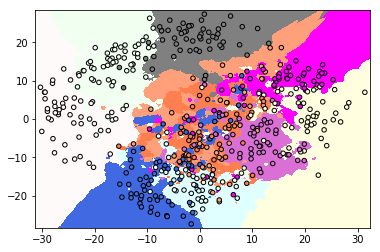

In [15]:
# PCA+kNN

draw_PCA(knn_clf, reduced_X_train_pca)

In [ ]:
#PCA + SVM

draw_PCA(svm_clf, reduced_X_train_pca)

In [ ]:
#PCA + DT

draw_PCA(dt_clf, reduced_X_train_pca)

In [ ]:
#PCA + NN
draw_PCA(nn_clf, reduced_X_train_pca)

In [ ]:
#PCA + NB
draw_PCA(nb_clf, reduced_X_train_pca)